In [1]:
from numpy import *
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('dark_background')

In [214]:
class Unfolding:
    def __init__(self,t_=1,t=1):
        self.t_= t_
        self.t = t
        self.k = linspace(-pi,pi,500)
        self.val, self.vec = self.eig()
        self.val =real(array(self.val).T)
    def tb(self,k):
        t = self.t
        t_ = self.t_
        return array([[0,t+t_*exp(-2j*k)],[t+t_*exp(2j*k),0]])*(-1/2)
    def eig(self):
        val = []
        vec = []
        for i in range(len(self.k)):
            sol  = linalg.eigh(self.tb(k[i]))
            val.append(sol[0])
            vec.append(sol[1])
        return (val,vec)  
    def weight(self,position,orbital):
        k = self.k
        vec = self.vec
        proj = [exp(-1j*1*position[i]) for i in range(len(position)) for j in range(orbital) ]
        res = zeros(shape=(len(k),len(proj)))
        for i in range(len(k)):
            for j in range(len(proj)):
                res[i][j] = real(conj(vec[i].T[j][0]+vec[i].T[j][1]*exp(-1j*k[i]))*(vec[i].T[j][0]+vec[i].T[j][1]*exp(-1j*k[i]))/2)
        return(res)
                
    def unfold(self,position,orbital):
        k=self.k
        val = self.val
        w = self.weight(position,orbital)
        plt.figure(figsize=(8,6))
        plt.title("Unfolded Band",size=16)
        plt.plot(k,val.T,c="white")
        plt.scatter(k,val[0],s=w[:,0]*20,c="red")
        plt.scatter(k,val[1],s=w[:,1]*20,c="red")
        plt.ylim(-1,1)
        plt.xlim(-pi,pi)
        plt.plot([-pi/2,-pi/2],[plt.ylim()[0],plt.ylim()[1]],c="white")
        plt.plot([pi/2,pi/2],[plt.ylim()[0],plt.ylim()[1]],c="white")
        plt.plot([-pi,pi],[0,0],c="white")
        plt.xticks([-pi,-pi/2,0,pi/2,pi],["-π","-π/2",0,"π/2","π"],size=16)
        plt.yticks([-1,0,1])
        plt.savefig("unfold.pdf")
        plt.show()
        

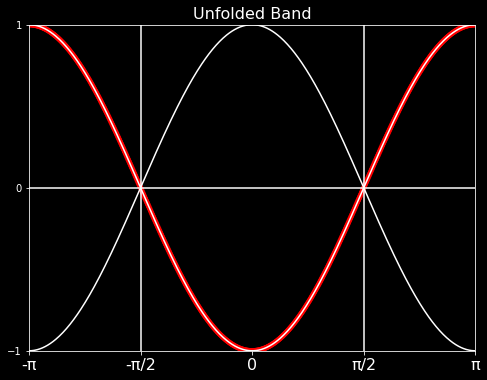

In [215]:
model = Unfolding(t_=1)
model.unfold(position = [0,1], orbital = 1)
k = model.k
val = model.val

In [208]:
##### Extended Plot


# fig, ax= plt.subplots(2, 2,figsize=(20,12))

# ax[0][0].plot([-pi/2,-pi/2],[-1,1],c="white",lw=0.3)
# ax[0][0].plot([pi/2,pi/2],[-1,1],c="white",lw=0.3)
# ax[0][0].plot([-pi,pi],[0,0],c="white",lw=0.3)
# ax[0][0].set_yticks([-1,0,1])
# ax[0][0].set_yticklabels(["-1","0","1"],fontsize=16)
# ax[0][0].set_ylim(-1,1)
# ax[0][0].set_title("Projected Cell",size=16)
# ax[0][0].plot(k,-cos(k),c="w")
# ax[0][0].set_xlim(-pi,pi)
# ax[0][0].set_xticks([-pi,-pi/2,0,pi/2,pi])
# ax[0][0].set_xticklabels(["-π","-π/2",0,"π/2","π"],fontsize=16)
# ax[0][0].set_xlim(-pi,pi)

# ax[0][1].plot([-pi/2,-pi/2],[-1,1],c="white",lw=0.3)
# ax[0][1].plot([pi/2,pi/2],[-1,1],c="white",lw=0.3)
# ax[0][1].plot([-pi,pi],[0,0],c="white",lw=0.3)
# ax[0][1].set_yticks([-1,0,1])
# ax[0][1].set_yticklabels(["-1","0","1"],fontsize=16)
# ax[0][1].set_ylim(-1,1)
# ax[0][1].set_title("Supercell",size=16)
# ax[0][1].plot(k,val.T,c="w")
# ax[0][1].set_xlim(-pi/2,pi/2)
# ax[0][1].set_xticks([-pi/2,0,pi/2])
# ax[0][1].set_xticklabels(["-π/2",0,"π/2"],fontsize=16)

# ax[1][0].plot([-pi/2,-pi/2],[-1,1],c="white",lw=0.3)
# ax[1][0].plot([pi/2,pi/2],[-1,1],c="white",lw=0.3)
# ax[1][0].plot([-pi,pi],[0,0],c="white",lw=0.3)
# ax[1][0].set_yticks([-1,0,1])
# ax[1][0].set_yticklabels(["-1","0","1"],fontsize=16)
# ax[1][0].set_ylim(-1,1)
# ax[1][0].set_title("Extended Supercell",size=16)
# ax[1][0].plot(k,val.T,c="w")
# ax[1][0].set_xticks([-pi,-pi/2,0,pi/2,pi])
# ax[1][0].set_xticklabels(["-π","-π/2",0,"π/2","π"],fontsize=16)

# ax[1][1].plot([-pi/2,-pi/2],[-1,1],c="white",lw=0.3)
# ax[1][1].plot([pi/2,pi/2],[-1,1],c="white",lw=0.3)
# ax[1][1].plot([-pi,pi],[0,0],c="white",lw=0.3)
# ax[1][1].set_yticks([-1,0,1])
# ax[1][1].set_yticklabels(["-1","0","1"],fontsize=16)
# ax[1][1].set_ylim(-1,1)
# ax[1][1].set_title("Unfolded Band",size=16)
# ax[1][1].plot(k,val.T,c="w")
# ax[1][1].scatter(k,val[0],c="r",s=w[:,0]*20)
# ax[1][1].scatter(k,val[1],c="r",s=w[:,1]*20)
# ax[1][1].set_xlim(-pi,pi)
# ax[1][1].set_xticks([-pi,-pi/2,0,pi/2,pi])
# ax[1][1].set_xticklabels(["-π","-π/2",0,"π/2","π"],fontsize=16)
# plt.savefig("Unfold-1D-TB.pdf")
# plt.show()